In [2]:
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


HC3_filtered = pd.concat([pd.read_hdf('/content/drive/MyDrive/HC3 - filtered/GPT_df_3.h5'), pd.read_hdf('/content/drive/MyDrive/HC3 - filtered/Human_df_3.h5')], axis=0).fillna(0)
GPT_2 = pd.concat([pd.read_hdf('/content/drive/MyDrive/GPT2/GPT_df_gpt2.h5'), pd.read_hdf('/content/drive/MyDrive/GPT2/Human_df_gpt2.h5')], axis=0).fillna(0)
HC3_unfiltered = pd.concat([pd.read_hdf('/content/drive/MyDrive/HC3 - Unfiltered/GPT_df_3.h5'), pd.read_hdf('/content/drive/MyDrive/HC3 - Unfiltered/Human_df_3.h5')], axis=0).fillna(0)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


bat


In [3]:
# Replacement dictionary
replacement_dict = {
    'Human_train': 'train',
    'Human_test': 'test',
    'Human_val': 'val',
    'GPT_train': 'train',
    'GPT_test': 'test',
    'GPT_val': 'val'
}

# Apply the replacements
GPT_2 = GPT_2.replace(replacement_dict)

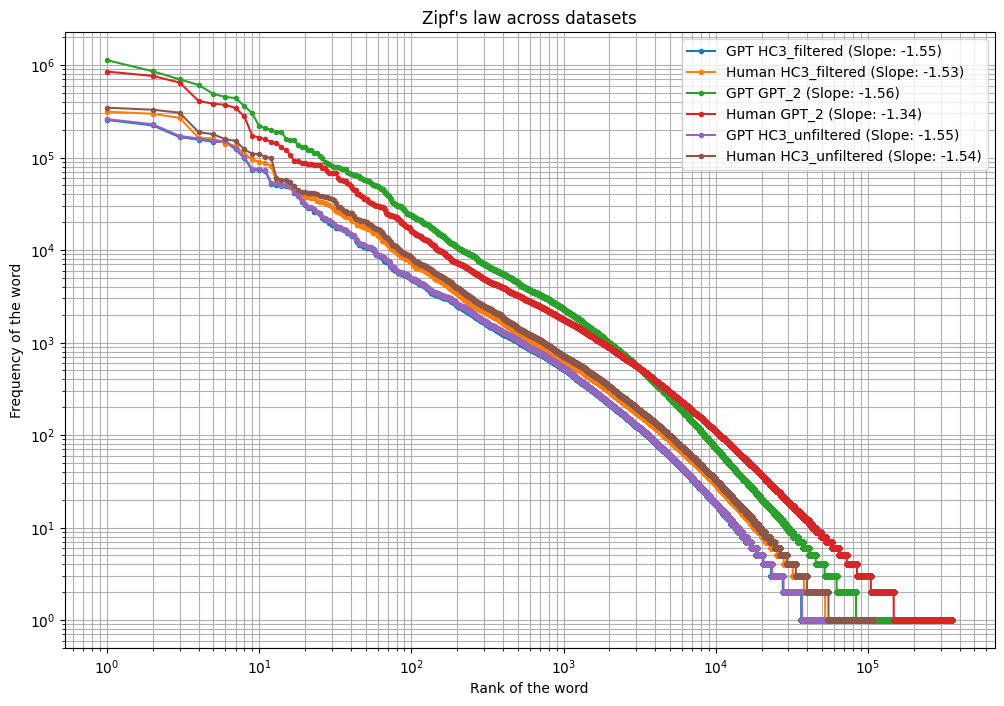

In [8]:
def compute_zipfs_law(datasets, labels):
    plt.figure(figsize=(12, 8))


    for data, label in zip(datasets, labels):
        gpt_texts = " ".join(data[data['label'] == 1]['text'])
        human_texts = " ".join(data[data['label'] == 0]['text'])

        # Process and plot for both GPT and Human texts
        for text, text_label in [(gpt_texts, 'GPT'), (human_texts, 'Human')]:
            tokens = nltk.word_tokenize(text.lower())
            freq_dist = nltk.FreqDist(tokens)
            common_words = dict(freq_dist.most_common())
            frequencies = np.array(list(common_words.values()))
            ranks = np.array(range(1, len(frequencies) + 1))

            # Calculate slope
            log_ranks = np.log(ranks)
            log_freqs = np.log(frequencies)
            slope, _ = np.polyfit(log_ranks, log_freqs, 1)

            plt.loglog(ranks, frequencies, marker=".", label=f'{text_label} {label} (Slope: {slope:.2f})')

    plt.title('Zipf\'s law across datasets')
    plt.xlabel('Rank of the word')
    plt.ylabel('Frequency of the word')
    plt.grid(True, which="both")
    plt.legend()
    plt.show()

datasets = [HC3_filtered, GPT_2, HC3_unfiltered]
dataset_labels = ["HC3_filtered", "GPT_2", "HC3_unfiltered"]
compute_zipfs_law(datasets, dataset_labels)